In [1]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

# modules
import knn as knnlibrary

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
props =knnlibrary.get_dataset()
props.head()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,3725ec6040dd4c59e6807752b23bc376fe927753,2016-07-01,sell,house,Esperanza,|Argentina|Santa Fe|Esperanza|,Argentina,Santa Fe,3856022.0,NaN,...,20.0,NaN,125000.000000,NaN,NaN,NaN,http://www.properati.com.ar/zo0f_venta_casa_sa...,Corredor Responsable: Martin Eguiazu - CCI Mat...,Venta de casa de 3 dormitorios,https://thumbs4.properati.com/8/JiQiOmUpHQ06Co...
1,d91f4f90ae4c28aff9d696dbee7e8d4fac154bc8,2016-07-01,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.592891,-58.408693",...,180.0,NaN,2111.111111,1.0,4.0,NaN,http://www.properati.com.ar/zo17_venta_departa...,Corredor Responsable: Uno Bienes Raices SRL - ...,Hermoso Piso en Edificio de Estilo.4amb con dep.,https://thumbs4.properati.com/4/bzYZriZno3lXfC...
2,17760ecd8751167a1ce2eed3d589d390874213cd,2016-07-01,sell,house,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.1105196,-57.6208718",...,260.0,NaN,NaN,NaN,5.0,NaN,http://www.properati.com.ar/zo1e_venta_casa_ma...,"En lo mejor de Rumenco , se encuentra esta cas...","Casa Rumenco , Los Sauces",https://thumbs4.properati.com/2/Ffvi9GU4qYv3lx...
3,8ac8b6411bffa318882cd2961c978cc931f35e93,2016-07-01,sell,house,Zárate,|Argentina|Buenos Aires Interior|Zárate|Zárate|,Argentina,Buenos Aires Interior,NaN,NaN,...,20.0,NaN,9750.000000,NaN,NaN,NaN,http://www.properati.com.ar/zo1k_venta_casa_za...,Corredor Responsable: Luis Alberto De Blas - C...,A demoler Lote para emprendimiento,https://thumbs4.properati.com/3/LxBdWMWXWHUxA8...
4,a1ad15fd9cbe67ddb0a7a735c5c4b27099871707,2016-07-01,sell,house,Zárate,|Argentina|Buenos Aires Interior|Zárate|Zárate|,Argentina,Buenos Aires Interior,NaN,NaN,...,166.0,NaN,813.253012,NaN,NaN,NaN,http://www.properati.com.ar/zo1l_venta_casa_za...,Corredor Responsable: Luis Alberto De Blas - C...,Casa una planta impecable.,https://thumbs4.properati.com/0/4ul13t9aSvCx4G...


In [3]:
# filtro por CABA y GBA
properties_caba = props[(props['place_with_parent_names'].str.contains('Capital Federal') \
                             | props['place_with_parent_names'].str.contains('Bs.As. G.B.A.'))]
properties_caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254535 entries, 1 to 34525
Data columns (total 27 columns):
id                            254535 non-null object
created_on                    254535 non-null object
operation                     254535 non-null object
property_type                 254535 non-null object
place_name                    254450 non-null object
place_with_parent_names       254535 non-null object
country_name                  254535 non-null object
state_name                    254535 non-null object
geonames_id                   197271 non-null float64
lat-lon                       206662 non-null object
lat                           206662 non-null float64
lon                           206662 non-null float64
price                         236708 non-null float64
currency                      232601 non-null object
price_aprox_local_currency    236708 non-null float64
price_aprox_usd               236708 non-null float64
surface_total_in_m2           189117

In [4]:
# filtramos propiedades con precio
properties_caba_with_price = properties_caba[properties_caba['price'].notnull() & properties_caba['price'] > 0]
properties_caba_with_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232023 entries, 1 to 34525
Data columns (total 27 columns):
id                            232023 non-null object
created_on                    232023 non-null object
operation                     232023 non-null object
property_type                 232023 non-null object
place_name                    231938 non-null object
place_with_parent_names       232023 non-null object
country_name                  232023 non-null object
state_name                    232023 non-null object
geonames_id                   178591 non-null float64
lat-lon                       187814 non-null object
lat                           187814 non-null float64
lon                           187814 non-null float64
price                         232023 non-null float64
currency                      232023 non-null object
price_aprox_local_currency    232023 non-null float64
price_aprox_usd               232023 non-null float64
surface_total_in_m2           173796

In [5]:
print("PROPIEDADES CON PRECIO")
properties_caba_with_price.info()
print("PROPIEDADES CON PRECIO CON MAS DE 50 PISOS")
properties_caba_with_price[properties_caba_with_price['floor'] >= 50].info()
print("PROPIEDADES CON PRECIO CON MAS DE 9 HABITACIONES")
properties_caba_with_price[properties_caba_with_price['rooms'] >= 9].info()
print("PROPIEDADES CON PRECIO CON MAS DE 9 HABITACIONES Y MAS DE 50 PISOS")
properties_caba_with_price[(properties_caba_with_price['floor'] >= 50) & (properties_caba_with_price['rooms'] >= 9)].info()
print("PROPIEDADES CON PRECIO CON MENOS DE 9 HABITACIONES Y MENOS DE 50 PISOS")
properties_caba_with_price[(properties_caba_with_price['floor'] <= 50) & (properties_caba_with_price['rooms'] <= 9)].info()

properties_caba_with_price_filtered = properties_caba_with_price[(properties_caba_with_price['floor'] <= 50) \
                                                                 & (properties_caba_with_price['rooms'] <= 9)]
properties_caba_with_price_filtered.info()

PROPIEDADES CON PRECIO
<class 'pandas.core.frame.DataFrame'>
Int64Index: 232023 entries, 1 to 34525
Data columns (total 27 columns):
id                            232023 non-null object
created_on                    232023 non-null object
operation                     232023 non-null object
property_type                 232023 non-null object
place_name                    231938 non-null object
place_with_parent_names       232023 non-null object
country_name                  232023 non-null object
state_name                    232023 non-null object
geonames_id                   178591 non-null float64
lat-lon                       187814 non-null object
lat                           187814 non-null float64
lon                           187814 non-null float64
price                         232023 non-null float64
currency                      232023 non-null object
price_aprox_local_currency    232023 non-null float64
price_aprox_usd               232023 non-null float64
surface_total

In [6]:
# filtro columnas segun lo que hay en el dataset
attributes = ['created_on','property_type','operation','place_name','place_with_parent_names',\
              'country_name','state_name','lat','lon','surface_total_in_m2','surface_covered_in_m2',\
              'floor','rooms','expenses', 'price']
properties_caba_with_price_filtered[attributes].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15412 entries, 1 to 34504
Data columns (total 15 columns):
created_on                 15412 non-null object
property_type              15412 non-null object
operation                  15412 non-null object
place_name                 15412 non-null object
place_with_parent_names    15412 non-null object
country_name               15412 non-null object
state_name                 15412 non-null object
lat                        14504 non-null float64
lon                        14504 non-null float64
surface_total_in_m2        9639 non-null float64
surface_covered_in_m2      14818 non-null float64
floor                      15412 non-null float64
rooms                      15412 non-null float64
expenses                   3866 non-null float64
price                      15412 non-null float64
dtypes: float64(8), object(7)
memory usage: 1.9+ MB


In [43]:
# como veo que casi no tengo datos voy a agregar mas
properties_caba_with_price_attributes = properties_caba_with_price[attributes]
properties_caba_with_price_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232023 entries, 1 to 34525
Data columns (total 15 columns):
created_on                 232023 non-null object
property_type              232023 non-null object
operation                  232023 non-null object
place_name                 231938 non-null object
place_with_parent_names    232023 non-null object
country_name               232023 non-null object
state_name                 232023 non-null object
lat                        187814 non-null float64
lon                        187814 non-null float64
surface_total_in_m2        173796 non-null float64
surface_covered_in_m2      207216 non-null float64
floor                      26635 non-null float64
rooms                      139312 non-null float64
expenses                   29638 non-null float64
price                      232023 non-null float64
dtypes: float64(8), object(7)
memory usage: 28.3+ MB


In [8]:
from sklearn.preprocessing import LabelEncoder

properties_caba_with_price_attributes.fillna('NaN', inplace=True)
# atributos categoricos
encoder = LabelEncoder()

properties_caba_with_price_attributes['property_type'] = encoder.fit_transform(properties_caba_with_price_attributes[['property_type']])
properties_caba_with_price_attributes['operation'] = encoder.fit_transform(properties_caba_with_price_attributes[['operation']])
properties_caba_with_price_attributes['place_name'] = encoder.fit_transform(properties_caba_with_price_attributes[['place_name']])
properties_caba_with_price_attributes['place_with_parent_names'] = encoder.fit_transform(properties_caba_with_price_attributes[['place_with_parent_names']])
properties_caba_with_price_attributes['country_name'] = encoder.fit_transform(properties_caba_with_price_attributes[['country_name']])
properties_caba_with_price_attributes['state_name'] = encoder.fit_transform(properties_caba_with_price_attributes[['state_name']])
properties_caba_with_price_attributes['created_on'] = encoder.fit_transform(properties_caba_with_price_attributes[['created_on']])
# completamos valores nan
from sklearn.preprocessing import Imputer
imputer_mean = Imputer(missing_values='NaN', strategy='mean', axis=0)
properties_caba_with_price_attributes['floor'] = imputer_mean.fit_transform(properties_caba_with_price_attributes[["floor"]])
properties_caba_with_price_attributes['rooms'] = imputer_mean.fit_transform(properties_caba_with_price_attributes[["rooms"]])

properties_caba_with_price_attributes["surface_total_in_m2"] = imputer_mean.fit_transform(properties_caba_with_price_attributes[["surface_total_in_m2"]])
properties_caba_with_price_attributes["surface_covered_in_m2"] = imputer_mean.fit_transform(properties_caba_with_price_attributes[["surface_covered_in_m2"]])
properties_caba_with_price_attributes["lat"] = imputer_mean.fit_transform(properties_caba_with_price_attributes[["lat"]])
properties_caba_with_price_attributes["lon"] = imputer_mean.fit_transform(properties_caba_with_price_attributes[["lon"]])
properties_caba_with_price_attributes["expenses"] = imputer_mean.fit_transform(properties_caba_with_price_attributes[["expenses"]])

properties_caba_with_price_attributes.head()

/opt/conda/lib/python3.5/site-packages/pandas/core/frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A

,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,price
1,231,1,0,18,160,0,3,-34.592891,-58.408693,87.817408,180.0,1.0,4.0,2253.800052,380000.0
16,231,1,0,146,90,0,1,-34.680247,-58.553347,59.000000,55.0,1.0,2.0,2253.800052,93000.0
17,231,1,0,146,90,0,1,-34.680247,-58.553347,59.000000,55.0,2.0,2.0,2253.800052,93000.0
18,231,1,0,146,90,0,1,-34.680247,-58.553347,59.000000,55.0,3.0,2.0,2253.800052,93000.0
19,231,1,0,146,90,0,1,-34.680247,-58.553347,59.000000,55.0,4.0,2.0,2253.800052,93000.0


In [9]:
# separamos el set de train
from sklearn.model_selection import train_test_split
import datetime

now = datetime.datetime.now()

# separamos el train de traing para validarlo luego usando un 30% de los datos
X, y = properties_caba_with_price_attributes.iloc[:, properties_caba_with_price_attributes.columns != 'price'].values, properties_caba_with_price_attributes.iloc[:, properties_caba_with_price_attributes.columns == 'price'].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=now.microsecond)
    
print(y_train)
    
len(X_test), len(X_train)

[[  49000.]
 [ 103000.]
 [  77000.]
 ..., 
 [ 124500.]
 [  95000.]
 [ 300000.]]


(4624, 10788)

In [10]:
# a cada dato le restamos la media y lo dividimos por su desviacion standard
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# KNN Train

In [11]:
from sklearn.base import clone
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, median_absolute_error, mean_squared_error

In [12]:
# clase para hacer Backward Selection
# no voy a hacer BS porque siempre me da mejor resultado cuando tengo todos los atributos
class SBS():
    def __init__(self, estimator, k_features,
        scoring=accuracy_score,
        test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
        random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
        X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train,
                X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
        
    def _calc_score(self, X_train, y_train,
                        X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score



In [30]:
# aplicamos algoritmos
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=40, weights='distance', p=2)
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.998554301738
Test accuracy: 0.43542106845


In [42]:
#k_param = 0
# probamos hiper-parametros
k_scores = []
k_list = []
p_list = []
labels = []

best_score = 0
best_k = 0
best_p = 0

for i in range(5,100, 5):
    for p in range(2,100, 5):
        knn = KNeighborsRegressor(n_neighbors=i, weights='distance', p=p)
        knn.fit(X_train_std, y_train)

        p_list.append(p)
        k_list.append(i)
        
        sc = knn.score(X_test_std[:, :], y_test)
        print('k='+str(i)+' |p='+str(p)+' |score='+str(sc))
        
        labels.append(str(round(sc,3)))
        k_scores.append(sc)
        
        if(sc > best_score):
            best_score = sc
            best_k = i
            best_p = p

mu = np.mean(k_scores)
v = np.var(k_scores)

k_scores = list(map(lambda x: ((x-mu)/v)*50, k_scores))

k=5 |p=2 |score=0.517649424972
k=5 |p=7 |score=0.501355611664
k=5 |p=12 |score=0.498239328284
k=5 |p=17 |score=0.499433649729
k=5 |p=22 |score=0.499973335241
k=5 |p=27 |score=0.499645248307
k=5 |p=32 |score=0.501484689148
k=5 |p=37 |score=0.50162215852
k=5 |p=42 |score=0.501363146095
k=5 |p=47 |score=0.501330525412
k=5 |p=52 |score=0.50207165189
k=5 |p=57 |score=0.502044840052
k=5 |p=62 |score=0.50188461164
k=5 |p=67 |score=0.502064977495
k=5 |p=72 |score=0.502065756388
k=5 |p=77 |score=0.501800788226
k=5 |p=82 |score=0.501812735955
k=5 |p=87 |score=0.500538779283
k=5 |p=92 |score=0.500519939958
k=5 |p=97 |score=0.500505209527
k=10 |p=2 |score=0.498219210621
k=10 |p=7 |score=0.470922411885
k=10 |p=12 |score=0.469979514868
k=10 |p=17 |score=0.469598416423
k=10 |p=22 |score=0.469115945518


KeyboardInterrupt: 

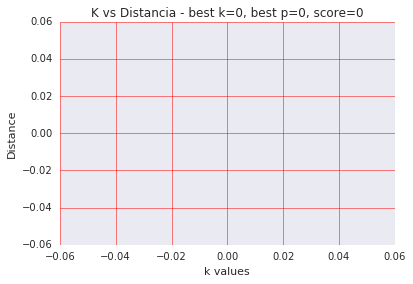

In [34]:
# graficamos
fig, ax = plt.subplots()
ax.scatter(k_list, p_list, s=k_scores, alpha=0.5)

title = "K vs Distancia - best k=%s, best p=%s, score=%s"%(best_k, best_p, best_score)
plt.title(title)
ylabel('Distance')
xlabel('k values')

for i, label in enumerate(labels):
    ax.annotate(label, (k_list[i],p_list[i]))

ax.grid(linestyle='-', linewidth='0.5', color='red')

plt.savefig('/home/jovyan/work/TP/TP2/img/best_k=%s-best_p=%s-score=%s.png'%(best_k, best_p, best_score));

# Prediccion

In [79]:
# leemos set de test
test_df = pd.read_csv('../data/test/properati_dataset_testing_noprice.csv', low_memory=False)
test_df.head()

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,description
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,-58.363464,0.0,NaN,NaN,NaN,NaN,Edificio BA Houses situado frente al Dique 3 d...
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,El departamento cuenta con un living-comedor a...
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,-58.412880,53.0,48.0,NaN,NaN,1500,IMPECABLE TORRE COY III – DEPA...
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,51.0,51.0,NaN,NaN,NaN,LIVING COMEDOR CON PISOS DE PO...


In [80]:
# seleccionamos los atributos que nos interesan
test_attributes_df = test_df[attributes]
test_attributes_df.info()

KeyError: "['price'] not in index"

In [81]:
from sklearn.preprocessing import LabelEncoder

test_attributes_df.fillna('NaN', inplace=True)
# atributos categoricos
encoder = LabelEncoder()

test_attributes_df['property_type'] = encoder.fit_transform(test_attributes_df[['property_type']])
test_attributes_df['operation'] = encoder.fit_transform(test_attributes_df[['operation']])
test_attributes_df['place_name'] = encoder.fit_transform(test_attributes_df[['place_name']])
test_attributes_df['place_with_parent_names'] = encoder.fit_transform(test_attributes_df[['place_with_parent_names']])
test_attributes_df['country_name'] = encoder.fit_transform(test_attributes_df[['country_name']])
test_attributes_df['state_name'] = encoder.fit_transform(test_attributes_df[['state_name']])
test_attributes_df['created_on'] = encoder.fit_transform(test_attributes_df[['created_on']])
# completamos valores nan
from sklearn.preprocessing import Imputer
imputer_mean = Imputer(missing_values='NaN', strategy='mean', axis=0)
test_attributes_df['floor'] = imputer_mean.fit_transform(test_attributes_df[["floor"]])
test_attributes_df['rooms'] = imputer_mean.fit_transform(test_attributes_df[["rooms"]])

test_attributes_df["surface_total_in_m2"] = imputer_mean.fit_transform(test_attributes_df[["surface_total_in_m2"]])
test_attributes_df["surface_covered_in_m2"] = imputer_mean.fit_transform(test_attributes_df[["surface_covered_in_m2"]])
test_attributes_df["lat"] = imputer_mean.fit_transform(test_attributes_df[["lat"]])
test_attributes_df["lon"] = imputer_mean.fit_transform(test_attributes_df[["lon"]])

# convierto primero a int
test_attributes_df["expenses"] = pd.to_numeric(test_attributes_df["expenses"], errors='coerce')
test_attributes_df["expenses"] = imputer_mean.fit_transform(test_attributes_df[["expenses"]])

test_attributes_df.head()

/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses
0,23,1,1,152,219,0,4,-34.610988,-58.363464,0.0,359.471588,10.679094,2.804667,8522.019176
1,24,1,1,29,180,0,3,-34.629923,-58.465820,0.0,359.471588,10.679094,2.804667,8522.019176
2,0,1,1,136,210,0,4,-34.589363,-58.412880,53.0,48.000000,10.679094,2.804667,1500.000000
3,0,1,1,40,193,0,4,-34.629923,-58.465820,39.0,39.000000,10.679094,2.804667,8522.019176
4,0,1,1,40,193,0,4,-34.629923,-58.465820,51.0,51.000000,10.679094,2.804667,8522.019176


In [82]:
test_attributes_std = stdsc.transform(test_attributes_df)
test_df['prediction'] = knn.predict(test_attributes_std)
test_df.head(10)

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,description,prediction
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,-58.363464,0.0,NaN,NaN,NaN,NaN,Edificio BA Houses situado frente al Dique 3 d...,147263.380750
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,El departamento cuenta con un living-comedor a...,77027.642141
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,-58.412880,53.0,48.0,NaN,NaN,1500,IMPECABLE TORRE COY III – DEPA...,91286.971177
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...,77018.244986
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,51.0,51.0,NaN,NaN,NaN,LIVING COMEDOR CON PISOS DE PO...,77017.815347
5,2263407,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...,77018.244986
6,2263408,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...,77018.244986
7,2263409,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...,77018.244986
8,2263410,2017-08-01,departamento,venta,Colegiales,|Argentina|Capital Federal|Colegiales|,Argentina,Capital Federal,"-34.5787213694,-58.4570952614",-34.578721,-58.457095,67.0,67.0,NaN,NaN,2600,EXCELENTE 2 AMB- APTO PROFESIO...,77000.310961
9,2263411,2017-08-01,departamento,venta,Almagro,|Argentina|Capital Federal|Almagro|,Argentina,Capital Federal,NaN,NaN,NaN,47.0,47.0,NaN,NaN,NaN,IMPECABLE MONOAMBIENTE- DIVISI...,77052.608833


In [83]:
output = pd.DataFrame( data={"id":test_df["id"], "price_usd":test_df['prediction']} )

In [84]:
# ejecutamos knn
output.to_csv( "../data/result/result_knn_"+str(now)+".csv", index=False, quoting=3 )